## CK

In [2]:
import os
import pandas as pd
# https://github.com/serengil/deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image

# https://github.com/serengil/deepface

In [2]:
# Ping the downloader 
demography = DeepFace.analyze("../datasets/demo.webp")

Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]   


### Annotate CK - Test by DeepFace - Done - 2024-11-05

(including angry, fear, neutral, sad, disgust, happy and surprise)

In [6]:
def analyze_faces_in_directory(directory, emotion_folder, expansion="", demo=False):
    # Create a DataFrame to store the analysis results
    results_df = pd.DataFrame(columns=["Image", "Age", "Gender", "Race", "Emotion"])
    results = []

    # Loop through all files in the directory

    files = os.listdir(directory)

    for demo_i, filename in enumerate(files):
        if demo and demo_i >= 5:
            break
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
            file_path = os.path.join(directory, filename)
            try:
                # Analyze the face in the image with enforce_detection=False
                print(f"Processing {filename}")
                analysis = DeepFace.analyze(img_path=file_path, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)

                # DeepFace returns a list, so access the first dictionary in the list
                analysis = analysis[0]

                # Extract data from the analysis dictionary
                
                #age = analysis.get('age', 'N/A')  # Use .get() to handle missing keys
                #gender = analysis.get('dominant_gender', 'N/A')  # Correct key for gender
                #race = analysis.get('dominant_race', 'N/A')  # Correct key for race
                #emotion = analysis.get('dominant_emotion', 'N/A')  # Correct key for emotion
                #print(analysis)

                result_dict = {
                    "Image": f"{emotion_folder}_-_{filename}",
                    "Age": analysis.get('age', 'N/A'),
                    "Gender": analysis.get('dominant_gender', 'N/A'),
                    "Race": analysis.get('dominant_race', 'N/A'),
                    "Emotion": analysis.get('dominant_emotion', 'N/A')
                }
                
                # Append dictionary to results list
                results.append(result_dict)

                # Print the results for the current image
                # print(f"Processed {filename}: Age: {age}, Gender: {gender}, Race: {race}")

            except Exception as e:
                # Handle the error gracefully and continue processing
                print(f"Error processing {filename}: {e}")
                continue

    # Save results to CSV for further use
    # Convert results list to DataFrame only at the end
    if results:  # Check if we have any results
        results_df = pd.DataFrame(results)
        output_file = f'face_analysis_results_{emotion_folder}_{expansion}.csv'
        results_df.to_csv(output_file, index=False)
        print(f"Analysis completed! Results saved to {output_file}")
    else:
        print("No results to save!")


# Example usage
DEMO = True
directory_path = '../datasets/ck/'
expansion = "ck"
emotion_folders = ['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'contempt']
for e in emotion_folders:
    analyze_faces_in_directory(directory=f"{directory_path}/{e}", 
                               emotion_folder=e,
                               expansion=expansion,
                               demo=DEMO)  


Processing S010_004_00000017.png


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]


Processing S010_004_00000018.png


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]


Processing S010_004_00000019.png


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]


Processing S011_004_00000019.png


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]


Processing S011_004_00000020.png


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]


Analysis completed! Results saved to face_analysis_results_anger_ck.csv
Processing S005_001_00000009.png


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]


Processing S005_001_00000010.png


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]


Processing S005_001_00000011.png


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]


Processing S011_005_00000018.png


Action: race:  50%|█████     | 2/4 [00:00<00:00,  2.11it/s]  


KeyboardInterrupt: 

-------------------------------------------------

### Evaulate Affecnet Test dataset predictions

- Accuracy

https://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

   Unnamed: 0                     pth     label    relFCs
0           0  anger/image0000006.jpg  surprise  0.873142
1           1  anger/image0000060.jpg     anger  0.852311
2           2  anger/image0000061.jpg     anger  0.800957
3           3  anger/image0000066.jpg   disgust  0.843079
4           4  anger/image0000106.jpg     anger  0.849108
                      Image  Age Gender   Race  Emotion
0  anger_-_image0000006.jpg   30  Woman  white  neutral
1  anger_-_image0000060.jpg   34    Man  white  neutral
2  anger_-_image0000061.jpg   44    Man  white    happy
3  anger_-_image0000066.jpg   49    Man  white      sad
4  anger_-_image0000106.jpg   30    Man  black    angry
                     Image  Age Gender   Race  Emotion
0    contempt_-_ffhq_1.png   31    Man  white  neutral
1   contempt_-_ffhq_10.png   32  Woman  white      sad
2  contempt_-_ffhq_100.png   29    Man  white     fear
3  contempt_-_ffhq_101.png   34  Woman  white    angry
4  contempt_-_ffhq_102.png   27    Man  w

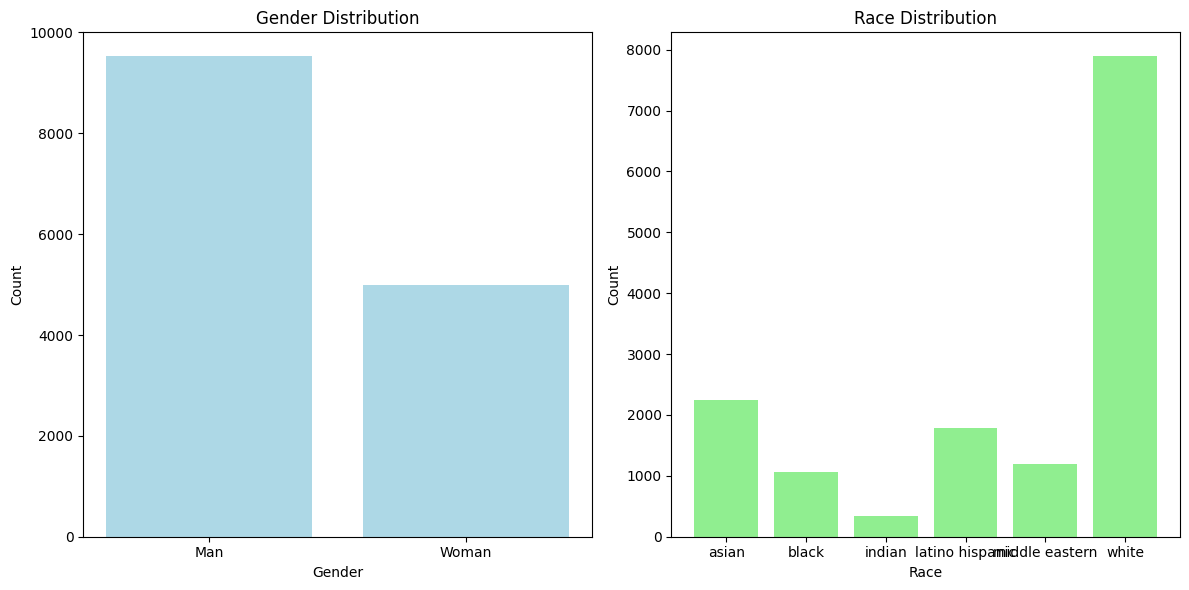

In [6]:
files = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
file_name = "results/AffectNet - Test/face_analysis_results_"

# Initialize empty dataframes for merging
gender_counts = pd.DataFrame()
race_counts = pd.DataFrame()

df_affectnet_ground_th = pd.read_csv("../datasets/AffectNet/labels.csv")
print(df_affectnet_ground_th.head())

# Loop through each file, read the CSV, and aggregate Gender and Race counts
for file in files:
    # file is also class name
    df = pd.read_csv(file_name + file + ".csv")
    print(df.head())
    
    # Count gender and race occurrences
    gender_count = df['Gender'].value_counts().reset_index()
    race_count = df['Race'].value_counts().reset_index()

    # Rename columns to avoid conflicts during merge
    gender_count.columns = ['Gender', 'Count']
    race_count.columns = ['Race', 'Count']

    # Append counts to the final dataframes (gender and race)
    if gender_counts.empty:
        gender_counts = gender_count
    else:
        gender_counts = pd.concat([gender_counts, gender_count])

    if race_counts.empty:
        race_counts = race_count
    else:
        race_counts = pd.concat([race_counts, race_count])

# Group by 'Gender' and 'Race' and sum up the counts
final_gender_counts = gender_counts.groupby('Gender')['Count'].sum().reset_index()
final_race_counts = race_counts.groupby('Race')['Count'].sum().reset_index()

# Plotting the distribution of Gender and Race categories
plt.figure(figsize=(12, 6))

# Plot Gender distribution
plt.subplot(1, 2, 1)
plt.bar(final_gender_counts['Gender'], final_gender_counts['Count'], color='lightblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot Race distribution
plt.subplot(1, 2, 2)
plt.bar(final_race_counts['Race'], final_race_counts['Count'], color='lightgreen')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

### Accuracy per race

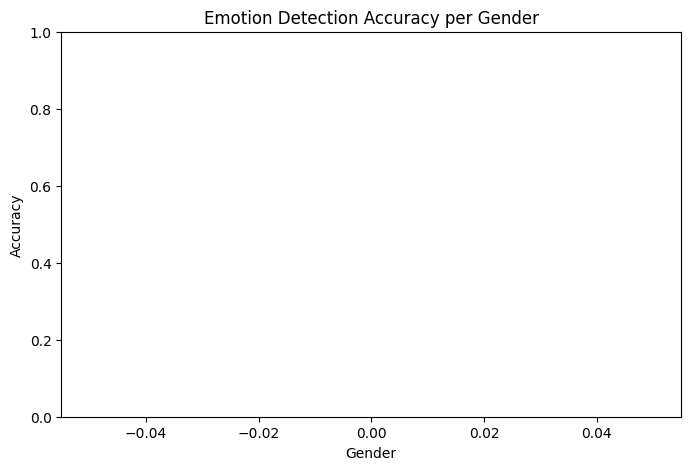

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_affectnet_ground_th = pd.read_csv("../datasets/AffectNet/labels.csv")
files = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
files = ["anger", "fear", "neutral", "sad", "disgust", "happy", "surprise"]
file_name = "results/AffectNet - Test/face_analysis_results_"

# Merge the datasets based on the image filename
# Create a new column in ground truth with formatted filenames to match annotated results
df_affectnet_ground_th['Image'] = df_affectnet_ground_th['pth'].apply(lambda x: x.split('/')[-1])

# Initialize an empty DataFrame to collect all annotated results
df_results = pd.DataFrame()

# Loop through each file, read and concatenate them to a single DataFrame
for file in files:
    GROUND_TRUTH_EMOTION = file
    df = pd.read_csv(file_name + file + ".csv")
    df_results = pd.concat([df_results, df])

# Merge ground truth with predictions
df_merged = pd.merge(df_affectnet_ground_th, df_results, on='Image')

# Create a new column indicating if the prediction is correct
df_merged['Correct'] = df_merged['label'] == df_merged['Emotion']

# Calculate accuracy per gender
accuracy_per_gender = df_merged.groupby('Gender')['Correct'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(accuracy_per_gender['Gender'], accuracy_per_gender['Correct'], color='lightblue')
plt.title('Emotion Detection Accuracy per Gender')
plt.xlabel('Gender')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.show()

In [9]:
df_affectnet_ground_th

,Unnamed: 0,pth,label,relFCs,Image
0,0,anger/image0000006.jpg,surprise,0.873142,image0000006.jpg
1,1,anger/image0000060.jpg,anger,0.852311,image0000060.jpg
2,2,anger/image0000061.jpg,anger,0.800957,image0000061.jpg
3,3,anger/image0000066.jpg,disgust,0.843079,image0000066.jpg
4,4,anger/image0000106.jpg,anger,0.849108,image0000106.jpg
...,...,...,...,...,...
28170,28170,surprise/image0034960.jpg,surprise,0.825263,image0034960.jpg
28171,28171,surprise/image0034961.jpg,surprise,0.738646,image0034961.jpg
28172,28172,surprise/image0034966.jpg,surprise,0.774524,image0034966.jpg
28173,28173,surprise/image0034973.jpg,neutral,0.766952,image0034973.jpg


In [10]:
df_results

,Image,Age,Gender,Race,Emotion
0,anger_-_image0000006.jpg,30,Woman,white,neutral
1,anger_-_image0000060.jpg,34,Man,white,neutral
2,anger_-_image0000061.jpg,44,Man,white,happy
3,anger_-_image0000066.jpg,49,Man,white,sad
4,anger_-_image0000106.jpg,30,Man,black,angry
...,...,...,...,...,...
1915,surprise_-_image0023909.jpg,16,Man,white,neutral
1916,surprise_-_image0023917.jpg,31,Woman,white,neutral
1917,surprise_-_image0023918.jpg,30,Woman,white,surprise
1918,surprise_-_image0023926.jpg,30,Man,black,surprise


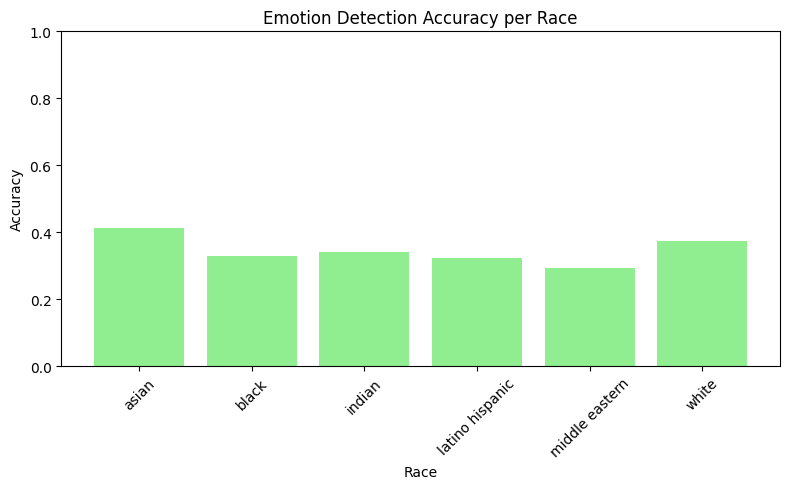

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_affectnet_ground_th = pd.read_csv("../datasets/AffectNet/labels.csv")

# Add a formatted Image column to match results for easier merge
df_affectnet_ground_th['Image'] = df_affectnet_ground_th['pth'].apply(lambda x: x.split('/')[-1])
df_affectnet_ground_th['label'] = df_affectnet_ground_th['pth'].apply(lambda x: x.split('/')[0])


files = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
files = ["anger", "fear", "neutral", "sad", "disgust", "happy", "surprise"] # DeepFace classes
# files = ["neutral"]
file_name = "results/AffectNet - Test/face_analysis_results_"

# Initialize an empty DataFrame to collect all annotated results
df_results = pd.DataFrame()

# Loop through each file, read and concatenate them to a single DataFrame
for file in files:
    df = pd.read_csv(file_name + file + ".csv")
    
    # Split the Image column to extract only the part after the first underscore
    df['Formatted_Image'] = df['Image'].apply(lambda x: x.split('_-_')[-1])  # Extract 'image0000006.jpg'
    
    # Add the GROUND_TRUTH_EMOTION to reconstruct the full path in ground truth
    df['Image'] = file + "/" + df['Formatted_Image']  # Recreate the full path format as 'anger/image0000006.jpg'
    
    df_results = pd.concat([df_results, df])

df_results.rename(columns={"Image": "pth"}, inplace=True)
# Merge ground truth with predictions using the formatted Image column
df_merged = pd.merge(df_affectnet_ground_th, df_results, on='pth')

# Create a new column indicating if the prediction is correct
df_merged['Correct'] = df_merged['label'] == df_merged['Emotion']

# Calculate accuracy per gender and emotion
# Calculate accuracy per race
accuracy_per_race = df_merged.groupby('Race')['Correct'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(accuracy_per_race['Race'], accuracy_per_race['Correct'], color='lightgreen')
plt.title('Emotion Detection Accuracy per Race')
plt.xlabel('Race')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df_results

,pth,Age,Gender,Race,Emotion,Formatted_Image
0,anger/image0000006.jpg,30,Woman,white,neutral,image0000006.jpg
1,anger/image0000060.jpg,34,Man,white,neutral,image0000060.jpg
2,anger/image0000061.jpg,44,Man,white,happy,image0000061.jpg
3,anger/image0000066.jpg,49,Man,white,sad,image0000066.jpg
4,anger/image0000106.jpg,30,Man,black,angry,image0000106.jpg
...,...,...,...,...,...,...
1915,surprise/image0023909.jpg,16,Man,white,neutral,image0023909.jpg
1916,surprise/image0023917.jpg,31,Woman,white,neutral,image0023917.jpg
1917,surprise/image0023918.jpg,30,Woman,white,surprise,image0023918.jpg
1918,surprise/image0023926.jpg,30,Man,black,surprise,image0023926.jpg


In [40]:
df_affectnet_ground_th

,Unnamed: 0,pth,label,relFCs,Image
0,0,anger/image0000006.jpg,anger,0.873142,image0000006.jpg
1,1,anger/image0000060.jpg,anger,0.852311,image0000060.jpg
2,2,anger/image0000061.jpg,anger,0.800957,image0000061.jpg
3,3,anger/image0000066.jpg,anger,0.843079,image0000066.jpg
4,4,anger/image0000106.jpg,anger,0.849108,image0000106.jpg
...,...,...,...,...,...
28170,28170,surprise/image0034960.jpg,surprise,0.825263,image0034960.jpg
28171,28171,surprise/image0034961.jpg,surprise,0.738646,image0034961.jpg
28172,28172,surprise/image0034966.jpg,surprise,0.774524,image0034966.jpg
28173,28173,surprise/image0034973.jpg,surprise,0.766952,image0034973.jpg


In [41]:
accuracy_per_race = df_merged['Correct'].mean()

In [42]:
df_merged['Correct'].mean()

0.36336008727499414

In [43]:
df_merged

,Unnamed: 0,pth,label,relFCs,Image,Age,Gender,Race,Emotion,Formatted_Image,Correct
0,0,anger/image0000006.jpg,anger,0.873142,image0000006.jpg,30,Woman,white,neutral,image0000006.jpg,False
1,1,anger/image0000060.jpg,anger,0.852311,image0000060.jpg,34,Man,white,neutral,image0000060.jpg,False
2,2,anger/image0000061.jpg,anger,0.800957,image0000061.jpg,44,Man,white,happy,image0000061.jpg,False
3,3,anger/image0000066.jpg,anger,0.843079,image0000066.jpg,49,Man,white,sad,image0000066.jpg,False
4,4,anger/image0000106.jpg,anger,0.849108,image0000106.jpg,30,Man,black,angry,image0000106.jpg,False
...,...,...,...,...,...,...,...,...,...,...,...
12828,26111,surprise/image0023909.jpg,surprise,0.807990,image0023909.jpg,16,Man,white,neutral,image0023909.jpg,False
12829,26112,surprise/image0023917.jpg,surprise,0.775216,image0023917.jpg,31,Woman,white,neutral,image0023917.jpg,False
12830,26113,surprise/image0023918.jpg,surprise,0.729153,image0023918.jpg,30,Woman,white,surprise,image0023918.jpg,True
12831,26114,surprise/image0023926.jpg,surprise,0.777204,image0023926.jpg,30,Man,black,surprise,image0023926.jpg,True


In [19]:
accuracy_per_gender_emotion

,Gender,Emotion,Correct
0,Man,angry,0.000000
1,Man,disgust,0.639175
2,Man,fear,0.255692
3,Man,happy,0.551077
4,Man,neutral,0.185671
5,Man,sad,0.245271
6,Man,surprise,0.517949
7,Woman,angry,0.000000
8,Woman,disgust,0.676471
9,Woman,fear,0.287293


In [17]:
df_merged

,Unnamed: 0,pth,label,relFCs,Image,Age,Gender,Race,Emotion,Formatted_Image,Correct
0,0,anger/image0000006.jpg,surprise,0.873142,image0000006.jpg,30,Woman,white,neutral,image0000006.jpg,False
1,1,anger/image0000060.jpg,anger,0.852311,image0000060.jpg,34,Man,white,neutral,image0000060.jpg,False
2,2,anger/image0000061.jpg,anger,0.800957,image0000061.jpg,44,Man,white,happy,image0000061.jpg,False
3,3,anger/image0000066.jpg,disgust,0.843079,image0000066.jpg,49,Man,white,sad,image0000066.jpg,False
4,4,anger/image0000106.jpg,anger,0.849108,image0000106.jpg,30,Man,black,angry,image0000106.jpg,False
...,...,...,...,...,...,...,...,...,...,...,...
14088,26111,surprise/image0023909.jpg,surprise,0.807990,image0023909.jpg,16,Man,white,neutral,image0023909.jpg,False
14089,26112,surprise/image0023917.jpg,disgust,0.775216,image0023917.jpg,31,Woman,white,neutral,image0023917.jpg,False
14090,26113,surprise/image0023918.jpg,surprise,0.729153,image0023918.jpg,30,Woman,white,surprise,image0023918.jpg,True
14091,26114,surprise/image0023926.jpg,surprise,0.777204,image0023926.jpg,30,Man,black,surprise,image0023926.jpg,True


In [15]:
df_results.rename(columns={"Image": "pth"}, inplace=True)

In [13]:
df_affectnet_ground_th

,Unnamed: 0,pth,label,relFCs,Image
0,0,anger/image0000006.jpg,surprise,0.873142,image0000006.jpg
1,1,anger/image0000060.jpg,anger,0.852311,image0000060.jpg
2,2,anger/image0000061.jpg,anger,0.800957,image0000061.jpg
3,3,anger/image0000066.jpg,disgust,0.843079,image0000066.jpg
4,4,anger/image0000106.jpg,anger,0.849108,image0000106.jpg
...,...,...,...,...,...
28170,28170,surprise/image0034960.jpg,surprise,0.825263,image0034960.jpg
28171,28171,surprise/image0034961.jpg,surprise,0.738646,image0034961.jpg
28172,28172,surprise/image0034966.jpg,surprise,0.774524,image0034966.jpg
28173,28173,surprise/image0034973.jpg,neutral,0.766952,image0034973.jpg


------------------

In [ ]:
Test_data = pd.read_csv('face_analysis_results.csv')
Test_data

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def display_images_with_labels(df, image_directory):
    # Number of images to display
    num_images = len(df)
    
    # Create a 3x2 grid
    fig, axes = plt.subplots(3, 2, figsize=(8, 8))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= 6:  # Show only 6 images max (for the 3x2 grid)
            break
        
        image_path = os.path.join(image_directory, row['Image'])
        
        # Check if the image file exists
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            
            # Add label for the image
            label = f"Age: {row['Age']}\nGender: {row['Gender']}\nRace: {row['Race']}"
            axes[i].set_title(label, fontsize=14)
        else:
            # If the image doesn't exist, show a placeholder
            axes[i].text(0.5, 0.5, 'Image not found', horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i].axis('off')
    
    # Adjust layout to make space for titles
    plt.tight_layout()
    plt.show()


# Replace with your actual image directory
image_directory = 'data/archive/AffectNet/Train/_test'

# Display the images with labels
display_images_with_labels(Test_data, image_directory)

In [ ]:
# Function to add an Age Group column
def add_age_group(df):
    # Define a function to assign age groups
    def get_age_group(age):
        lower_bound = (age // 10) * 10  # Get the lower bound of the age group
        upper_bound = lower_bound + 9  # The upper bound
        return f"{lower_bound}-{upper_bound}"

    # Apply the function to the Age column to create the Age Group column
    df['Age Group'] = df['Age'].apply(get_age_group)
    return df
df_with_age_group = add_age_group(Test_data)

df_with_age_group